<div bgcolor="#99ff99"><b><big><big><font bgcolor="#99ff99"
color="#006600">Point Estimation</font></big></big></b></div>


<big><font bgcolor="#99ff99" color="#996633">

 **a)** Sample mean
  $$ \bar X=\sum_{i=1}^n\frac{X_i}{n}$$
 
 **b)** (biased) Sample Variance
 $$ \hat{\sigma^2}=\frac{1}{n}\sum_{i=1}^n   (X_i-\bar X)^2$$
 **c)** (unbiased) Sample Variance
 $$ s^2_n=\frac{1}{n-1}\sum_{i=1}^n  (X_i-\bar X)^2$$
 </font></big>

Sample mean
---
  $$ \bar X=\sum_{i=1}^n\frac{X_i}{n}$$
  
  \begin{eqnarray}
  \hbox{mean}     &=& E \bar X\\
                  &=& \frac{1}{n}E \sum_{i=1}^nX_i=\frac{n\mu}{n}=\mu\\
  \hbox{variance} &=& E \left( \bar X -\mu \right)^2 \\ 
                  &=& \sum_{i=1}^n \frac{1}{n^2} E  (X_i-\mu)^2
                  &=& \frac{\sigma^2}{n}
\end{eqnarray}

Since 
$$ \hbox{Var} \bar X =  \frac{\sigma^2}{n}\le \sigma^2=\hbox{Var} X_1 $$

the unbiased estimator $\bar X$ has smaller variance than the unbiased estimator $X_1$.

The *Weak Law of Large Numbers* states that 
$$\bar X \to \mu \text{ in probabolity.}$$ 
Thus, as the sample size increases, the estimator $\bar X$ converges in probability to the estimand $\mu$.



Sample Variance
---
Estimation of variance, $\sigma^2$:
$$ \hat{\sigma^2}=\frac{1}{n}\sum_{i=1}^n   (X_i-\bar X)^2$$


It's known as *biased* estimate since:

\begin{eqnarray}
  E \hat{\sigma^2} &=& \frac{1}{n}\sum_{i=1}^n  E  (X_i-\bar X)^2 \\ 
                  &=& \frac{1}{n}\sum_{i=1}^n  E \left(-\frac{1}{n}(X_1-\mu)-\cdots+
                      \frac{n-1}{n}(X_i-\mu)-\cdots-\frac{1}{n}(X_n-\mu)\right)^2  \\ 
                  &=& \frac{1}{n} \cdot\sum_{i=1}^n \frac{(n-1)+(n-1)^2}{n^2}  \sigma^2 
                      +\sum_{i}\sum_{i\ne j}c_{ij}E(X_i-\mu)(X_j-\mu)\\
                  &=& \frac{n-1}{n}\sigma^2 (\ne \sigma^2)
\end{eqnarray}

Note that the final result comes from the fact: $\{X_i\}$ are independent with each other. It's called *biased* estimator.

The following is another popular variance esitmator:

$$ s^2_n=\frac{1}{n-1}\sum_{i=1}^n  (X_i-\bar X)^2$$
since it is unbiased:
$$ E s^2_n= \frac{1}{n-1}\sum_{i=1}^n  E  (X_i-\bar X)^2=\frac{n}{n-1}\cdot \frac{n-1}{n}\cdot\sigma^2=\sigma^2$$

Confidence Intervals
---
There are two methods of estimating various population (patently unknown) quantities:
- Point estimation where a single guess about the value of the estimated quantity is proposed 
- Confidence intervals where a whole range of values is considered

Estimation for the population mean $\mu$ ($\sigma$ known)
---

<div bgcolor="#99ff99"><b><big><big><font bgcolor="#99ff99"
color="#006600">Interval Estimate of Population Mean</font></big></big></b></div>



<font color="#996633">
**Two-sided confidence Interval** with $(1-\alpha)$:    ...[-----o-----]...


$$ \left( \bar{x} - z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}, \bar{x} +
   z_{\alpha / 2} \frac{\sigma}{\sqrt{n}} \right) $$
   
**Upper one-sided confidence Interval** with $(1-\alpha)$:  -----------]...
$$ \left(-\infty, \bar{x} + z_{1-\alpha } \frac{\sigma}{\sqrt{n}}\right) $$  
**Lower one-sided confidence Interval** with $(1-\alpha)$: ...[-----------
$$ \left( \bar{x} + z_{\alpha } \frac{\sigma}{\sqrt{n}}, \infty\right) $$   



Steps
---
1. evaluate sample mean, $\bar x$

2. calculate $\sigma/\sqrt n$;

3. 
 
    - two-sided confidence interval: $(\bar x-z_{1-\alpha/2}\sigma/\sqrt n,\bar x+z_{1-\alpha/2}\sigma/\sqrt n)$
    - upper one sided confidence interval:  $(-\infty,\bar x+z_{1-\alpha}\sigma/\sqrt n)$
    - lower one sided confidence interval:  $(\bar x+z_{\alpha}\sigma/\sqrt n,\infty)$


- Let us denote the $100(1 −\alpha∕2)$ percentile of the standard normal distribution as $Z_{\alpha∕2}$. For random sample of sufficiently large size, the end points of the interval estimate at $(1 − \alpha)$ confidence level is given as follows:


\begin{eqnarray*}
  1 - \alpha & = & {\cal P} (| Z | \leqslant z_{\alpha / 2})\\
  & = & {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}} \right| \leqslant z_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{X} -{\mu}}{\sigma / \sqrt{n}} \right|
  \leqslant z_{\alpha / 2}\\
  \Rightarrow &  & \bar{X} - z_{\alpha / 2} \frac{\sigma}{\sqrt{n}} \leqslant
  {\mu} \leqslant \bar{X} + \frac{\sigma}{\sqrt{n}} z_{\alpha / 2}
\end{eqnarray*}
- upper one-sided $100(1-\alpha)$ configence interval:
\begin{eqnarray*}
  1 - \alpha & = & {\cal P} ( z_{\alpha }  \leqslant Z)\\
  & = & {\cal P} \left( z_{\alpha }  \leqslant \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}}  \right)\\
  \Rightarrow &  &  -z_{1-\alpha }=z_\alpha\leqslant \frac{\bar{X} -{\mu}}{\sigma / \sqrt{n}} \\
  \Rightarrow &  & {\mu} \leqslant \bar{X} + \frac{\sigma}{\sqrt{n}} z_{1-\alpha}
\end{eqnarray*}
- lower one-sided $100(1-\alpha)$ configence interval:
\begin{eqnarray*}
  1 - \alpha & = & {\cal P} ( Z\leqslant z_{1-\alpha }  )\\
  & = & {\cal P} \left( \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}} \leqslant z_{1-\alpha }  \right)\\
  \Rightarrow &  & \frac{\bar{X} -{\mu}}{\sigma / \sqrt{n}} \leqslant z_{1-\alpha }=-z_{\alpha} \\
  \Rightarrow &  &  \bar{X} + \frac{\sigma}{\sqrt{n}} z_{\alpha} \leqslant{\mu}
\end{eqnarray*}


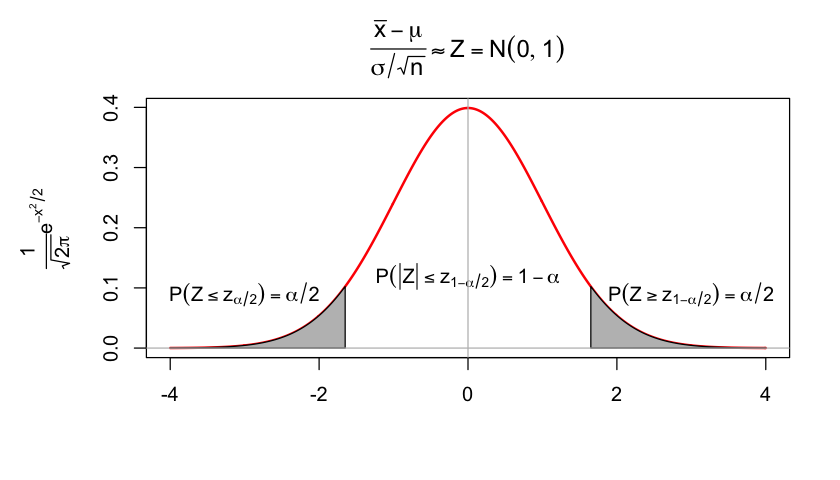

In [4]:
options(repr.plot.width=7)
options(repr.plot.height=4)
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dnorm(x)
plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main=expression(frac(bar(x)-mu,sigma/sqrt(n))%~~%Z==N(0,1)),
        ylab=expression(frac(1,sqrt(2*pi))* e^{-x^2/2})) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0)

text(0,0.12,expression(P(group("|",Z,"|") <= z[1-alpha/2])==1-alpha))

text(3,0.09,expression(P(Z >= z[1-alpha/2])==alpha/2))
polygon(x0, fx0, col="gray")



y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(fy0,0)
text(-3,0.09,expression(P(Z <= z[alpha/2])==alpha/2))
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")

Problem
---
Assume the population standard deviation $\sigma^2$ of the student height in survey is $9.48^2$. Find the margin of error and interval estimate at 95% confidence level.

**Solution**
We first filter out missing values in survey\$Height with the na.omit function, and save it in height.response.

In [6]:
library(MASS)                  # load the MASS package 
height.response = na.omit(survey$Height)

In [7]:
n = length(height.response) 
sigma = 9.48                   # population standard deviation 
sem = sigma/sqrt(n);       # standard error of the mean 
cat(sprintf("standard error of mean is %.3f ",sem))  

standard error of mean is 0.656 

In [8]:
E = qnorm(.975)*sem
cat(sprintf("margin of error  %.3f ",E))  

margin of error  1.285 

In [12]:
xbar <- mean(height.response)   # sample mean 
I<-xbar + c(-E, E)
cat(sprintf("Estimated interval of sample mean is [%.3f,%.3f] ",I[1],I[2]))  

Estimated interval of sample mean is [171.096,173.666] 

In [35]:
source("Rcodes/zConfInterval.R")

In [36]:
xbar <- mean(height.response)
n <- length(height.response) 
sigma<-9.48
alpha<-0.05
zConfInterval(xmean=xbar,sd=sigma,n=n,alpha=alpha,type="both")

  Two-sided (95)% confidence interval of μ is [171.096,173.666]

In [37]:
xbar <- mean(height.response)
n <- length(height.response) 
sigma<-9.48
alpha<-0.05
zConfInterval(xmean=xbar,sd=sigma,n=n,alpha=alpha,type="upper")

  Upper one-sided (95)% confidence interval of μ is (-oo,173.459]

In [38]:
xbar <- mean(height.response)
n <- length(height.response) 
sigma<-9.48
alpha<-0.05
zConfInterval(xmean=xbar,sd=sigma,n=n,alpha=alpha,type="lower")

  Lower one-sided (95)% confidence interval of μ is [171.302,oo)

Distribution of cholesterol levels
---
For all males in the United States who are hypertensive (have high systolic blood pressure) and smoke the distribution of cholesterol levels has an unknown mean μ and standard deviation $\sigma$ = 46 mg/100ml. If we draw a sample of size $n$ = 12 subjects from this group of hypertensive smokers and compute their (sample) mean cholesterol level $\bar x_{12}$ = 217 mg/100ml, the 95% confidence interval based on information from this sample is [191,243].


In [41]:
xbar <- 217
n <- 12 
sigma<-46
alpha<-0.05
zConfInterval(xmean=xbar,sd=sigma,n=n,alpha=alpha,type="both")

  Two-sided (95)% confidence interval of μ is [190.974,243.026]

Anemia and lead exposure
---
Suppose we select 74 children that have been exposed to high levels of lead, and we calculate their
mean hemoglobin levels as $\bar x_{74}$ = 10.6g/ml. Since there maybe some concern that exposure to
lead is associated with lower levels of hemoglobin, we will probably be interested only in an upper
limit of this value in the group of lead-exposed children. Based on this sample, and knowledge
of the population standard deviation $\sigma$ = 0.85g/ml, the 95% upper one-sided confidence interval
is $10.6 + 1.645\times0.85/\sqrt{74} \sim 10.8$. The unknown population mean hemoglobin level among lead-exposed 74
children is at most 10.8 g/ml.

In [42]:
xbar <- 10.6
n <- 74 
sigma<-0.85
alpha<-0.05
zConfInterval(xmean=xbar,sd=sigma,n=n,alpha=alpha,type="upper")

  Upper one-sided (95)% confidence interval of μ is (-oo,10.763]

Interval Estimate of Population Mean with Unknown Variance
---

If $\sigma$ is unknown, we have to replace the unknown parameter by some sample value, $s_n$, introduced before:
$$ s^2_n=\frac{1}{n-1}\sum_{i=1}^n  (X_i-\bar X)^2$$
since it is unbiased estimator of $\sigma$.

<div bgcolor="#99ff99"><b><big><big><font bgcolor="#99ff99"
color="#006600">Interval Estimate of Population Mean</font></big></big></b></div>



<font color="#996633">
**Two-sided confidence Interval** with $(1-\alpha)$

$$ \left[ \bar{x} - t_{n-1,\alpha / 2} \frac{s_n}{\sqrt{n}}, \bar{x} +
   t_{n-1,\alpha / 2} \frac{s_n}{\sqrt{n}} \right] $$
   
**Upper one-sided confidence Interval** with $(1-\alpha)$
$$ \left(-\infty, \bar{x} + t_{n-1,1-\alpha } \frac{s_n}{\sqrt{n}}\right] $$  
**Lower one-sided confidence Interval** with $(1-\alpha)$
$$ \left[ \bar{x} + t_{n-1,\alpha } \frac{s_n}{\sqrt{n}}, \infty\right) $$   



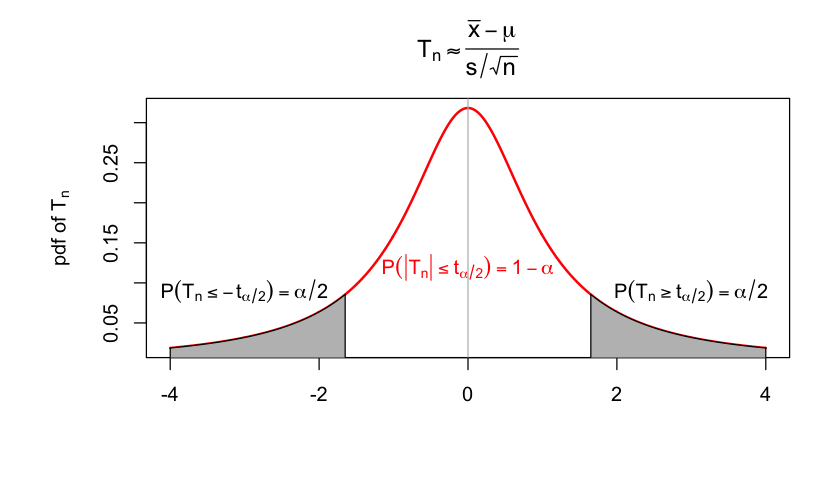

In [55]:
oldpar <- par(mar = c(5, 6, 4, 2) + 0.1) 
options(repr.plot.width=7)
options(repr.plot.height=4)
mu <- 0; sigma <- 1 
x <- seq(-4, 4, .01) 

fx <-dt(x,df=1)



plot(x, fx, type = "l", col='red',lwd = 2,xlab="",main=expression(T[n]%~~%frac(bar(x)-mu,s/sqrt(n))),
        ylab=expression(paste("pdf of ", T[n]))) 

x0 <- x[x >= 1.645]    # define region to fill
x0 <- c(x0[1], x0,tail(x0,n=1)) ;  fx0 <- fx[x >= 1.645]
fx0 <- c(0, fx0,0)

text(0,0.12,expression(P(group("|",T[n],"|") <= t[alpha/2])==1-alpha),col='red')

text(3,0.09,expression(P(T[n] >= t[alpha/2])==alpha/2))
polygon(x0, fx0, col="gray")



y0 <- x[x <= -1.645]    # define region to fill
y0 <- c( y0[1],y0,y0[length(y0)]) ;  fy0 <- fx[x <= -1.645]
fy0 <- c(0,fy0,0)
text(-3,0.09,expression(P(T[n] <= -t[alpha/2])==alpha/2))
polygon(y0, fy0, col="gray")

abline(h=0, col="gray") ; 
abline(v=0, col="gray")

Antacids and plasma aluminumn level
---
In estimating the plasma aluminum level among infants that have taken antacids containing alu- minum, a random sample of $n = 10$ infants was collected. The sample mean plasma aluminum level in this sample is $\bar x_{10} = 37.2$ μg/l, while the sample standard deviation is $s$ = 7.13μg/l. Since the mean and standard deviation of the plasma aluminum level in the population is unknown, a 95% two-sided confidence interval is based on the t distribution with $n − 1 = 9$ degrees of freedom as follows: (32.100,42.300)

In [48]:
source("Rcodes/tConfInterval.R")

In [49]:
xbar <- 37.2
df <- 9 
sn<-7.13
alpha<-0.05
tConfInterval(xmean=xbar,sd=sn,df=df,alpha=alpha,type="both")

  Two-sided (95)% confidence interval of μ is [32.100,42.300]

Confidence intervals of a difference of two means
---
Replace $t$ r.v. by the following:
$$T_{n_1+n_2-2}=\frac{\bar X_1-\bar X_2- (\mu_1-\mu_2)}{{s_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}}$$


Serum iron levels and cystic fibrosis
---
In this example $\bar x_1$ = 18μmol/l is the sample mean iron level in a sample of $n_1$ = 9 healthy children with standard deviation $s_1$ = 5.9μmol/l, and the iron levels among $n_2$ = 13 children with cystic fibrosis where $\bar x_2$ = 11.9μmol/l and $s_2$ = 6.3μmol/l respectively.

In [50]:
source("Rcodes/twoConfInterval.R")

In [53]:
x1<-18.9
x2<-11.9
xbar <- x1-x2
n1 <- 9
n2 <-13
s1<-5.9
s2<-6.3
alpha<-0.05
twoConfInterval(xmean=xbar,sd1=s1,n1=n1,sd2=s2,n2=n2,alpha=alpha,type="both")

  Two-sided (95)% confidence interval of μ is [1.446,12.554]

In [54]:
x1<-18.9
x2<-11.9
xbar <- x1-x2
n1 <- 9
n2 <-13
s1<-5.9
s2<-6.3
alpha<-0.05
twoConfInterval(xmean=xbar,sd1=s1,n1=n1,sd2=s2,n2=n2,alpha=alpha,type="lower")

  Lower one-sided (95)% confidence interval of μ is [2.408,oo)

Facts
---
- $Z\sim N(0,1)\to Z^2\sim \chi^2_1$: i.e square of $N(0,1)$-r.v. is $\chi^2$-square r.v. with degree 1.
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(0,1)$ r.v.'s $\to$ $X^2=\sum_i^n X_i^2$ is $\chi^2$-square r.v. with degree n ( $E X^2=n$).
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(\mu,\sigma^2)$ r.v.'s $\to$ $X^2=\sum_i^n (X_i-\mu)^2/\sigma^2$ is $\chi^2$-square r.v. with degree n ( $E X^2=n$).
- $\{X_i\}^{n}_{i=1}$ i.i.d. $N(\mu,\sigma^2)$ r.v.'s $\to$ $(n-1) s_n^2/\sigma^2=\sum_i^n (X_i-\bar X)^2/\sigma^2$ is $\chi^2$-square r.v. with degree $n-1$ ( $E (n-1) s_n^2/\sigma^2=n-1$).
- *student*-r.v. is defined as follows:
  $$ t=\frac{\bar X-\mu}{s_n/\sqrt n}$$
 Note that $$ E s_n^2 = \sigma^2$$
- pdf of $t_n$ is

 $$ f_{T_n}(t)=\frac{\Gamma[(n+1)/2]}{\sqrt{n\pi}\Gamma{[n/2]}}\left( 1+\frac{t^2}{n}\right)^{-(n+1)/2}$$

As case with known varianve:

\begin{eqnarray*}
  1 - \alpha & = & {\cal P} (| T | \leqslant t_{\alpha / 2})\\
  & = & {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{s_n /
  \sqrt{n}} \right| \leqslant t_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{X} -{\mu}}{s_n / \sqrt{n}} \right|
  \leqslant t_{\alpha / 2}\\
  \Rightarrow &  & \bar{X} - t_{\alpha / 2} \frac{s_n}{\sqrt{n}} \leqslant
  {\mu} \leqslant \bar{X} + \frac{s_n}{\sqrt{n}} t_{\alpha / 2}
\end{eqnarray*}
i.e for random sample of sufficiently large size, the interval estimated at
$(1 - \alpha)$ of sample mean is
$$ \left[ \bar{x} - t_{\alpha / 2} \frac{s_n}{\sqrt{n}}, \bar{x} +
   t_{\alpha / 2} \frac{s_n}{\sqrt{n}} \right] $$

Problem
---
Without assuming the population standard deviation of the student height in survey, find the margin of error and interval estimate at 95% confidence level.

**Solution**
We first filter out missing values in survey\$Height with the na.omit function, and save it in height.response.

In [ ]:
library(MASS)                  # load the MASS package 
height.response = na.omit(survey$Height)

In [ ]:
n = length(height.response) 
s = sd(height.response)        # sample standard deviation 
SE = s/sqrt(n);            # standard error estimate 
cat(sprintf("standard error of mean is %.3f ",SE)) 

In [ ]:
E = qt(.975, df=n-1)*SE;     # margin of error 
cat(sprintf("margin of error  %.3f ",E))  

In [ ]:
xbar <- mean(height.response)   # sample mean 
I <- xbar + c(-E, E) 
cat(sprintf("Estimated interval of sample mean is [%.3f,%.3f] ",I[1],I[2]))  

Sampling Size of Population Mean
---
The quality of a sample survey can be improved by increasing the sample size. The formula below provide the sample size needed under the requirement of population mean interval estimate at $(1 −\alpha)$ confidence level, margin of error $E$, and population variance $\sigma^2$. Here, $z_{\alpha/2}$ is the $100(1 − \alpha∕2)$ percentile of the standard normal distribution.

\begin{eqnarray*}
  1 - \alpha & = &  {\cal P} \left( \left| \frac{\bar{X} -{\mu}}{\sigma /
  \sqrt{n}} \right| \leqslant z_{\alpha / 2} \right)\\
  \Rightarrow &  & \left| \frac{\bar{x} -{\mu}}{\sigma / \sqrt{n}} \right|
  = z_{\alpha / 2}\\
  \Rightarrow n& = & \frac{z_{\alpha/2}^2\sigma^2}{E^2}
\end{eqnarray*}
where $ E=\bar{X} -{\mu}$



Problem
---
Assume the population standard deviation σ of the student height in survey is 9.48. Find the sample size needed to achieve a 1.2 centimeters margin of error at $95\%$ confidence level.

**Solution**
Since there are two tails of the normal distribution, the 95% confidence level would imply the 97.5th percentile of the normal distribution at the upper tail. Therefore, $z_{\alpha/2}$ is given by qnorm(.975).

In [ ]:
zstar <- qnorm(.975) 
sigma <- 9.48 
E <- 1.2 
n<-zstar^2 * sigma^2/ E^2 
cat(sprintf("Approximated sample size of population mean requires %d at least.",ceiling(n)))

In [ ]:
answer <- function(arg1,arg2){
    cat(sprintf(arg1,arg2))
}

In [ ]:
arg1 <- "Approximated size of samples for population mean requires %d at least."
arg2 <- ceiling(n)
answer(arg1,arg2)

Normal approximation to the binomial distribution
---
￼If $n$ is sufficiently large, then the statistic
$$ Z = \frac{􏰓x-np}{np(1 − p)} ∼ N (0, 1)$$

is approximately distributed as normal with mean 0 and standard deviation 1 (i.e., the standard normal distribution). A better approximation to the normal distribution is given by 
$ Z = \frac{􏰓x-np+0.5}{np(1 − p)}$ when $X<np$ and $ Z = \frac{􏰓x-np-0.5}{np(1 − p)}$ when $X>np$.

Sample distribution of a proportion
---
For binomial distribution, consider  the sample proportion, $ \bar p = x/ n$
￼￼￼￼￼￼￼￼￼where $x$ is the number of successes in the sample of size $n$.

- mean of $ \bar p$: $EX/n=np/n=p$;
- standard deviation of $ \bar p$: $\hbox{sd}(X)/ n=\sqrt{np(1-p)}/n=\sqrt{p(1-p)/n}$.
Then
$$ Z\sim \frac{\bar p -p}{\sqrt{p(1-p)/n}}$$

This approximation is particularly good when $np > 5$ and $n(1 − p) > 5$.

Example
---
(Five-year survival among lung-cancer patients)

Consider the five-year survival among patients under 40 years-old who have been diagnosed with lung cancer. The mean proportion 􏰓of individuals surviving is $p = 0.10$ (implying that the standard deviation of the 5-year survival is $\sqrt{0.10(1 − 0.10)} = 0.30$).

If we select repeated samples of size $n = 50$ patients diagnosed with lung cancer, what fraction of the samples will have 20% or more survivors? That is, “what percent of the time 10 $(= 50\times0.20)$ or more patients will be alive after 5 years”?


Since $np = (50)(0.1) = 5 ≥ 5$ and $n(1 − p) = (50)(0.9) = 45 > 5$, use the following normal approximation:
\begin{eqnarray}
   {\cal P}(\bar p\ge0.2)&=&{\cal P}\left( \frac{\bar p -p}{\sqrt{p(1-p)/n}} 
       \ge\frac{0.2 -p}{\sqrt{p(1-p)/n}}\right)\\
       &=&{\cal P}\left( Z\ge\frac{0.2 -0.1}{\sqrt{0.1(1-0.1)/50}}\right)\\
       &=&{\cal P}(Z\ge2.36)=0.009
\end{eqnarray}

In [ ]:
pnorm(2.36,lower.tail=F)

In [79]:
a<-0.05
n<-50
mean=0.1

sd=sqrt(0.1*(1-0.1))
x0=0.2
ztest(x=x0,n=n,mean=mean,sd=sd,alpha=a,type="greater")

        Testing Hypothesis
---------------------------------------
  H0: μ ≥ 0.100 v.s. Ha: μ < 0.100
  α level: 0.05, p-value: 0.99
  z_α: -1.64, μ+z_α*σ/√n : 0.03
 
       do not Reject H0
                       α = 0.050 p = 0.991
-----[------|-------o-------------------
                 μ0 = 0.10

x:  0.03  0.20
Z: -1.64  2.36


Hypothesis
---
If it is known from previous studies that the five-year survival rate of lung cancer patients that are older than 40 years old is $p_0=$8.2%, we might want to test whether the five-year survival among the younger lung-cancer patients is the same as that of the older ones.

1. State the null hypothesis:
  - Two-sided hypothesis: $H_0 : p = p_0$
  - One-sidedhypothesis: $H_0 : p\ge p_0$ or $H_0 : p\le p_0$
2. State the alternative hypothesis $H_1$
  - Two-sided hypothesis: $H_1 : p\ne p_0$
  - One-sidedhypothesis: $H_1 :p<p_0$ or $H_1 :p>p_0$
3. The alpha level of this test is $\alpha$% (usually 5% or 1%)
4. The test statistic is $Z =\frac{\bar p -p}{\sqrt{p(1-p)/n}}$
5. Reject the null hypothesis if:
  - Two-sided hypothesis: ${\cal P}(|Z| > z) < \alpha$
  - One-sided hypothesis: ${\cal P}(Z < −z) < \alpha$ or ${\cal P}(Z >z) < \alpha$ respectively
  
 where $z$ is the observed value of the statistic: $\frac{\bar p -p_0}{\sqrt{p(1-p)/n}}$

From a sample of $n = 52$ patients under the age of 40 that have been diagnosed with lung cancer the proportion surviving after five years is $\bar p = 0.115$.

1. $H_0 : p=0.082$
2. $H_1 : p\ne0.082$
3. The alpha level of this test is 0.01 (according to the textbook)
4. The test statistic is $Z =\frac{\bar p -p}{\sqrt{p(1-p)/n}}$
5. We will reject the null hypothesis if ${\cal P}(|Z| > z) < \alpha$.

Since $${\cal P}(|Z| > 0.87) = {\cal P}(Z > 0.87) + {\cal P}(Z < −0.87) = 0.192 + 0.192 = 0.384 > 0.05,$$ 
where
$$\frac{\bar p -p}{\sqrt{p(1-p)/n}}=\frac{0.115 -0.082}{\sqrt{0.082(1-0.082)/52}}=0.87$$

we do not reject the null hypothesis. That is, there is no evidence to indicate that the five-year survival of lung cancer patients who are younger than 40 years of age is different than that of the older patients.


In [77]:
(0.115-0.082)/sqrt(0.082*(1-0.082)/52)
2*pnorm(0.87,lower.tail=F)

[1] 0.8673359

[1] 0.3843004

In [6]:
source("Rcodes/ztest.R")

In [11]:
a<-0.05
n<-52
mean=0.082
sd=sqrt(x0*(1-x0))
x0=0.115
ztest(x=x0,n=n,mean=mean,sd=sd,alpha=a,type="two")

        Testing Hypothesis
---------------------------------------
  H0: μ = 0.082 v.s. Ha: μ ‡ 0.082
  α level: 0.050, p-value: 0.4557
  z_(α/2): -1.960, z_(1-α/2): 1.960,
  μ+z_(α/2)*σ/√n : -0.005,   μ+z_(1-α/2)*σ/√n : 0.169
 
              Do not Reject H0
                       p = 0.456 α = 0.050
               μ0 = 0.08

---------[---------o------|--------]---
x:      -0.00             0.12    0.17
Z:     -1.96             0.75     1.96


In [8]:
source("Rcodes/zConfInterval.R")

In [12]:
a<-0.05
n<-52
mean=0.015

sd=sqrt(x0*(1-x0))
x0=0.115
zConfInterval(x=x0,n=n,sd=sd,alpha=a,type="two")

  Two-sided (95)% confidence interval of μ is [0.028,0.202]

Serum iron levels and cystic fibrosis
---
In this example $\bar x_1$ = 18μmol/l is the sample mean iron level in a sample of $n_1$ = 9 healthy children with standard deviation $s_1$ = 5.9μmol/l, and the iron levels among $n_2$ = 13 children with cystic fibrosis where $\bar x_2$ = 11.9μmol/l and $s_2$ = 6.3μmol/l respectively.


Then the two-sided confidence interval of the true difference in iron levels between healthy children and children with cystic fibrosis with $\alpha=5\%$ is

In [14]:
source("Rcodes/twoSampletest.R")

In [53]:
a<-0.05
n1<-9
n2<-13
s1<-5.9
s2<-6.3
mean1<-18.9
mean2<-11.9
df<-n1+n2-2
mean<-mean1-mean2

sd<-((n1-1)*s1+(n2-1)*s2)/(n1+n2-2)
x0<-mean1-mean2
twoSampletest(x=x0,n1=n1,n2=n2,sd1=sd1,sd2=sd2,alpha=a,type="both")

        Testing Hypothesis
---------------------------------------
  H0: μ1 = μ2 v.s. Ha: μ1 ‡ μ2
  α level: 0.050, p-value: 0.0161
  t_(20,α/2): -2.086, t_(20,1-α/2): 2.086,
  t_(20,α/2)*s*√(1/n1+1/n2) : -5.554,   t_(20,1-α/2)*s*√(1/n1+1/n2) : 5.554
 
              Reject H0
                       p = 0.016 α = 0.050
              μ1 = μ2
-------[--------o--------]-----|---
X:   -5.55              5.55  7.00
T:   -2.09              2.09  2.63

##(1-0.050) - confidence interval is##

                   [7.000+(-5.554),7.000+(5.554)] = [1.446,12.554]


Example (Mortality of pediatric victims)
---
In a study investigating morbidity and mortality among pediatric victims of motor vehicles accidents, information regarding the effectiveness of seat belts was collected. Two random samples were selected, one of size $n_1 = 123$ from a population of children that were wearing seat belts at the time of the accident, and another of size $n_2 = 290$ from a group of children that were not wearing seat belts at the time of the accident. In the first case, $x_1 = 3$ children died, while in the second $x_2 = 13$ died. Consequently, $\hat p_1 = 0.024$ and $\hat p_2 = 0.045$ and the task is to compare the two.

Pre-estimation:
- $\hat p=(x_1+x_2)/(n_1+n_2)=0.039$

In [30]:
a<-0.05
n1<-123
n2<-290
x1<-3
x2<-13
p1<-0.024
p2<-0.045
p<-(x1+x2)/(n1+n2)
#s1<-sqrt((p1)*(1-p1))
#s2<-sqrt((p2)*(1-p2))
sd=sqrt(p*(1-p)*(1/n1+1/n2))
mean1<-x1/n1
mean2<-x2/n2
df<-n1+n2-2
mean<-mean1-mean2

#sd<-((n1-1)*s1+(n2-1)*s2)/(n1+n2-2)
x0<-p1-p2
ztest(x=x0,mean=0,sd=sd,alpha=a,n=1,type="both")

        Testing Hypothesis
---------------------------------------
  H0: μ = 0.000 v.s. Ha: μ ‡ 0.000
  α level: 0.050, p-value: 1.6881
  z_(α/2): -1.960, z_(1-α/2): 1.960,
  μ+z_(α/2)*σ/√n : -0.041,   μ+z_(1-α/2)*σ/√n : 0.041
 
              Do not Reject H0
                       p = 1.688 α = 0.050
               μ0 = 0.00

---------[------|---o-------------]---
x:      -0.04   -0.02             0.04
Z:     -1.96  -1.01             1.96


In [19]:
16/413

[1] 0.03874092

In [38]:
x0/sqrt(p*(1-p)*(1/n1+1/n2))

[1] -1.011325

Confidence intervals of the difference between two proportions
---
Confidence intervals of the difference of two proportions are also based on the statistic 

$$Z=\frac{\hat p_1-\hat p_2-(p_1-p_2)}{\sqrt{\hat p_1(1-\hat p_1)/n_1+\hat p_2(1-\hat p_2)/n_2}}$$

In [41]:
a<-0.05
n1<-123
n2<-290
x1<-3
x2<-13
p1<-0.024
p2<-0.045
p<-(x1+x2)/(n1+n2)
#s1<-sqrt((p1)*(1-p1))
#s2<-sqrt((p2)*(1-p2))
sd=sqrt(p1*(1-p1)/n1+p2*(1-p2)/n2)
mean1<-x1/n1
mean2<-x2/n2
df<-n1+n2-2
mean<-mean1-mean2

#sd<-((n1-1)*s1+(n2-1)*s2)/(n1+n2-2)
x0<-p1-p2
zConfInterval(xmean=x0,sd=sd,alpha=a,n=1,type="both")

  Two-sided (95)% confidence interval of μ is [-0.057,0.015]